1. https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4
2. https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-2-2a92fdc0160d
3. https://towardsdatascience.com/fine-grained-sentiment-analysis-part-3-fine-tuning-transformers-1ae6574f25a6
4. https://towardsdatascience.com/fasttext-under-the-hood-11efc57b2b3

In [1]:
pwd 

'D:\\AI_Fundamentals\\PART2'

In [2]:
import pytreebank
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [3]:
dataset = pytreebank.load_sst()

In [4]:
dataset = pytreebank.load_sst()
pytreebank.LabeledTree.inject_visualization_javascript()
example = dataset["train"][0]
example.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# extract spans from the tree.
for label, sentence in example.to_labeled_lines():
	print("%s has sentiment label %s" % (
		sentence,
		["very negative", "negative", "neutral", "positive", "very positive"][label]
	))

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . has sentiment label positive
The Rock has sentiment label neutral
The has sentiment label neutral
Rock has sentiment label neutral
is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . has sentiment label very positive
is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal has sentiment label positive
is has sentiment label neutral
destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal has sentiment label very positive
destined has sentiment label neutral
to be the 

In [6]:
dataset = pytreebank.load_sst("/path/to/sentiment/")
train_data = pytreebank.import_tree_corpus("/path/to/sentiment/train.txt")
test_data = pytreebank.import_tree_corpus("/path/to/sentiment/test.txt")
dev_data = pytreebank.import_tree_corpus("/path/to/sentiment/dev.txt")

In [7]:
def format_to_df(data):
    train_df = []
    for exp in data:
        tmp = exp.to_labeled_lines()[0]
        train_df.append(tmp)
        
    train_df = pd.DataFrame(train_df)
    train_df.columns = ["truth", "text"]
    return train_df

In [8]:
train_data = format_to_df(train_data)
dev_data = format_to_df(dev_data)
test_data = format_to_df(test_data)

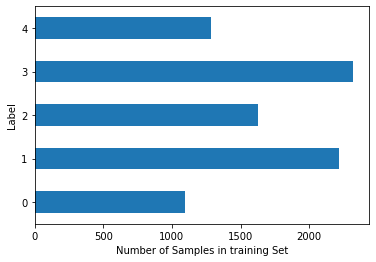

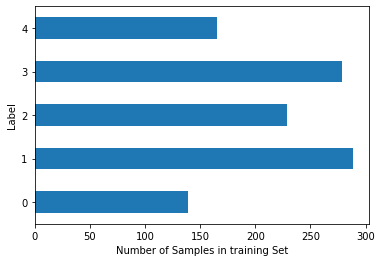

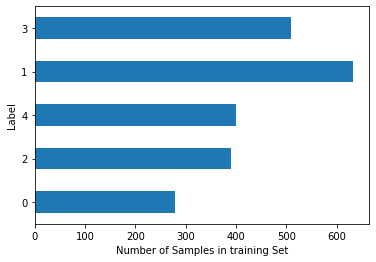

In [9]:
ax = train_data['truth'].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")
plt.show()

ax = dev_data['truth'].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")
plt.show()

ax = test_data['truth'].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")
plt.show()

In [10]:
train_data['len'] = train_data['text'].str.len()  # Store string length of each sample
train_data = train_data.sort_values(['len'], ascending=True)
print(train_data.head(50))

dev_data['len'] = dev_data['text'].str.len()  # Store string length of each sample
dev_data = dev_data.sort_values(['len'], ascending=True)
print(dev_data.head(20))

test_data['len'] = test_data['text'].str.len()  # Store string length of each sample
test_data = test_data.sort_values(['len'], ascending=True)
print(test_data.head(20))


      truth         text  len
593       2         Go .    4
8484      2         Eh .    4
4198      3        Wow .    5
5286      3        Yes .    5
5288      1        No. .    5
1270      1        Why ?    5
2038      2       A. . .    6
335       3       Cool .    6
7669      2       Bang !    6
7670      3       Zoom !    6
8388      1      Weird .    7
2083      2      C'mon !    7
8304      2     Please .    8
2185      2     Renner ?    8
5655      1     A mess .    8
2382      4     See it .    8
5418      2     ending .    8
8536      2     Barely .    8
8353      2     Touché !    8
8359      4     See it .    8
8521      0     Crummy .    8
7997      2     Spy-vs .    8
4130      2     Almost .    8
5748      1    Too bad .    9
776       4    Amazing !    9
8480      1    Shallow .    9
1596      2    And how .    9
5281      2    A drama ?    9
5274      2    Ruh-roh !    9
6862      1    But no. .    9
6584      1    Too bad .    9
8438      1    Obvious .    9
3610      

In [11]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred)
confusion_matrix([1,0,0,1], [0,0,1,1])
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


class Base:
    """Base class that houses common utilities for reading in test data
    and calculating model accuracy and F1 scores.
    """
    def __init__(self) -> None:
        pass

    def read_data(self, filepath: str, lower_case: bool=False, colnames=['truth', 'text']) -> pd.DataFrame:
        data = pytreebank.import_tree_corpus(filepath)
        df = []
        for exp in data:
            tmp = exp.to_labeled_lines()[0]
            df.append(tmp)
        df = pd.DataFrame(df)
        df.columns = ["truth", "text"]
        df["truth"] = df["truth"].apply(lambda x: int(x))
        if lower_case:
            df["text"] = df["text"].str.lower()
        return df


    def accuracy(self, df: pd.DataFrame) -> None:
        "Prediction accuracy (percentage) and F1 score"
        acc = accuracy_score(df['truth'], df['pred'])*100
        f1 = f1_score(df['truth'], df['pred'], average='macro')
        print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))
        

    @abstractmethod
    def score(self, text: str) -> int:
        """Return a sentiment score on sample text, an integer in the range [1, 2, 3, 4, 5]"""
        # Apply some sentiment scoring technique here depending on method used 
        pass
        
    def predict(self, train_file: None, test_file: str, lower_case: bool) -> pd.DataFrame:
        """Return a Pandas DataFrame that applies the sentiment scoring method on each
           row of the test set
        """
        df = self.read_data(test_file, lower_case)
        df['pred'] = df['text'].apply(self.score)
        
    
    def plot_confusion_matrix(self, dataframe):
        y_true = list(dataframe["truth"])
        y_pred = list(dataframe["pred"])
        con_mat = confusion_matrix(y_true, y_pred)
        df_cm = pd.DataFrame(con_mat, index = list(set(y_true)), columns = list(set(y_true)))
        plt.figure(figsize = (10,7))
        sn.heatmap(df_cm, annot=True)
        plt.show()

Logistic Regression

In [12]:
class LogisticRegressionSentiment(Base):
    """Predict fine-grained sentiment scores using a sklearn Logistic Regression pipeline."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.linear_model import LogisticRegression
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
            ]
        )

    def predict(self, train_file: str, test_file: str, lower_case: bool=False) -> pd.DataFrame:
        "Train model using sklearn pipeline"
        train_df = self.read_data(train_file, lower_case)
        learner = self.pipeline.fit(train_df['text'], train_df['truth'])
        # Predict class labels using the learner and output DataFrame
        test_df = self.read_data(test_file, lower_case)
        test_df['pred'] = learner.predict(test_df['text'])
        return test_df

In [13]:
log_model = LogisticRegressionSentiment()
out_df = log_model.predict("/path/to/sentiment/train.txt", "/path/to/sentiment/test.txt", True)
log_model.accuracy(out_df)

Accuracy: 40.18099547511312
Macro F1-score: 0.3295860165192341


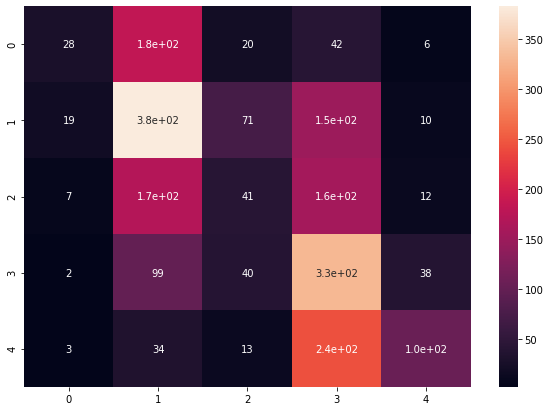

In [14]:
log_model.plot_confusion_matrix(out_df)

Support Vector Machines

In [15]:
class SVMSentiment(Base):
    """Predict fine-grained sentiment scores using a sklearn 
    linear Support Vector Machine (SVM) pipeline."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.linear_model import SGDClassifier
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None,
                )),
            ]
        )

    def predict(self, train_file: str, test_file: str, lower_case: bool=False) -> pd.DataFrame:
        "Train model using sklearn pipeline"
        train_df = self.read_data(train_file, lower_case)
        learner = self.pipeline.fit(train_df['text'], train_df['truth'])
        # Predict class labels using the learner and output DataFrame
        test_df = self.read_data(test_file, lower_case)
        test_df['pred'] = learner.predict(test_df['text'])
        return test_df

In [16]:
svm_model = SVMSentiment()
out_df = svm_model.predict("/path/to/sentiment/train.txt", "/path/to/sentiment/test.txt", True)
svm_model.accuracy(out_df)

Accuracy: 41.40271493212669
Macro F1-score: 0.3822501115052496


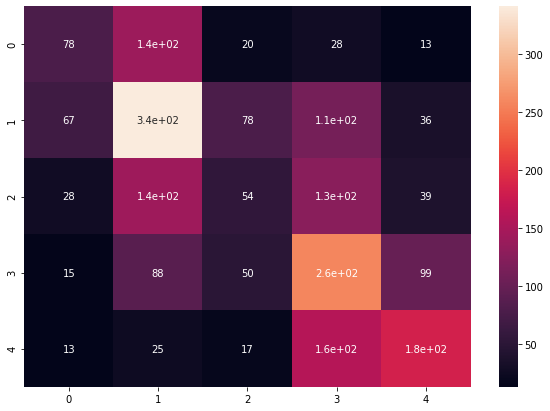

In [17]:
svm_model.plot_confusion_matrix(out_df)

In [18]:
#!pip install fasttext

In [19]:
class FastTextSentiment(Base):
    """Predict fine-grained sentiment scores using FastText"""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        import fasttext
        self.model = fasttext.load_model(model_file)

    def score(self, text: str) -> int:
        # Predict just the top label (hence 1 index below)
        labels, probabilities = self.model.predict(text, 1)
        pred = int(labels[0][-1])
        return pred

    def predict(self, train_file: None, test_file: str, lower_case: bool) -> pd.DataFrame:
        df = self.read_data(test_file, lower_case)
        df['pred'] = df['text'].apply(self.score)
        return df

In [ ]:
ft_model = FastTextSentiment()
out_df = ft_model.predict("/path/to/sentiment/train.txt", "/path/to/sentiment/test.txt", True)
ft_model.accuracy(out_df)

In [ ]:
svm_model.plot_confusion_matrix(out_df)